Start Model Analysis...
CART: 0.896474 (0.005431)
Completed Model Analysis...


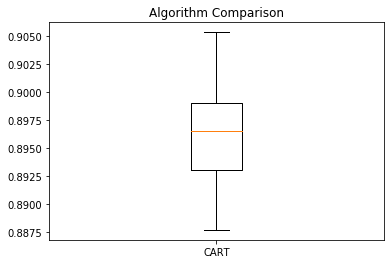

0.8929229150223625
[[478  50   0   0   0   0   0]
 [ 31 550   0   0   0   0   0]
 [  0   0 459  57   0   0   0]
 [  0   0  48 462  49   1   0]
 [  0   0   0  28 483  29   3]
 [  0   0   0   0   9 469  57]
 [  0   0   0   0   1  44 493]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       528
           1       0.92      0.95      0.93       581
           2       0.91      0.89      0.90       516
           3       0.84      0.82      0.83       560
           4       0.89      0.89      0.89       543
           5       0.86      0.88      0.87       535
           6       0.89      0.92      0.90       538

    accuracy                           0.89      3801
   macro avg       0.89      0.89      0.89      3801
weighted avg       0.89      0.89      0.89      3801



In [79]:
'''
One reason to discretize continuous features is to improve 
signal-to-noise ratio. Fitting a model to bins reduces the 
impact that small fluctuates in the data has on the model, 
often small fluctuates are just noise. Each bin "smooths" 
out the fluctuates/noises in sections of the data.
'''

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

import numpy as np

url = "C:\\Work\\Workspace\\Project\\record.csv"
names = ['name', 'address', 'phoneNumber', 'region','age', 'callCount', 'activeCallTime', 
         'smsCount', 'dataUsage', 'Subscription_1', 'Subscription_2', 
         'Subscription_3', 'Subscription_4', 'plan']
dataset = read_csv(url, names=names)

#print(dataset.info())
#print(dataset.describe())

'''
The below command can be used to find the unique elements in the data set,
which can be eliminated for further processing
'''

dataset.pop('name')
dataset.pop('address')
dataset.pop('phoneNumber')
#dataset.pop('region')

#print(dataset.describe(include=np.object))

#print(dataset.groupby('plan').size())

#dataset.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
#pyplot.show()


#dataset.hist()
'''
fig, axes = pyplot.subplots(figsize=(19,10), dpi=50, nrows=3, ncols=4)
flat_axes = list(axes.reshape(-1))
fig.delaxes(flat_axes.pop(-1))
fig.delaxes(flat_axes.pop(-1))

dataset.hist(ax=flat_axes, alpha=0.5, label='x',color='b')

pyplot.plot()
'''
le = LabelEncoder()


df = dataset[dataset.columns[:]].apply(le.fit_transform)

array = df.values
X = array[:,0:9]
y = array[:,10]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("Start Model Analysis...")
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

print("Completed Model Analysis...")
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Read dataset from the csv file
filename = "E:\\Work\\FinalProjectData\\unsupervised_data.csv"
dataset  = read_csv(filename)

dataset.pop('name')
dataset.pop('phoneNumber')
dataset.pop('address')

le = LabelEncoder()
for col in dataset.columns:
    if col == 'city':
        le.fit(dataset[col])
        dataset[col] = le.transform(dataset[col])
        
array = dataset.values

X = array[:,0:9]
y = array[:,10]

dataset.plot(kind='scatter',x='subscription_d', color='red')
pyplot.show()